In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_absolute_error, median_absolute_error, RocCurveDisplay, roc_curve, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram

In [61]:
data = pd.read_csv('countries_of_the_world.csv', sep=",")

In [62]:
data.head(10)
print(data.dtypes)

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object


In [63]:
num_records = data.shape[0]
num_features = len(data.columns.tolist())
print(num_records)
print(num_features)

227
20


In [64]:
print(data.columns.tolist())

['Country', 'Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']


In [65]:
ConvertToFloat = ['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

for column in ConvertToFloat:
    if data[column].dtype == 'object':
        try:
            data[column] = data[column].str.replace(',', '').astype(float)
        except ValueError:
            # If conversion fails, you can choose to handle it differently
            # For now, let's replace with NaN
            data[column] = float('nan')

In [66]:
le = LabelEncoder()

for column in data.columns:
    if column != 'Country' and data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

In [67]:
data_X = data.drop('Country', axis = 1)

In [68]:
scaler = StandardScaler()
scaler.fit(data_X)
scaler.transform(data_X)

array([[-1.70711389,  0.01969468,  0.02758332, ..., -0.54988298,
        -1.14044931, -1.39113701],
       [-0.81353621, -0.21387688, -0.31879748, ...,  0.98880169,
        -0.18499444,  0.63783518],
       [ 0.08004147,  0.03561811,  0.99842051, ..., -0.05020703,
        -1.24531631, -0.41603023],
       ...,
       [-0.21781776, -0.06192308, -0.03933023, ...,  0.21945935,
         1.46957375, -0.05974121],
       [ 0.97361915, -0.14654488,  0.08642673, ..., -0.67678481,
        -1.11131959,  0.30029822],
       [ 0.97361915, -0.14029829, -0.11624192, ...,  0.56843938,
         0.1354325 ,  0.63783518]])

In [69]:
data = data.dropna()
data_X = data_X.dropna()
data.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,0,31056997,647500,480.0,0.0,2306.0,16307.0,700.0,360.0,32.0,1213.0,22.0,8765.0,0,466.0,2034.0,38.0,24.0,38.0
1,Albania,3,3581655,28748,1246.0,126.0,-493.0,2152.0,4500.0,865.0,712.0,2109.0,442.0,7449.0,4,1511.0,522.0,232.0,188.0,579.0
2,Algeria,6,32930091,2381740,138.0,4.0,-39.0,31.0,6000.0,700.0,781.0,322.0,25.0,9653.0,0,1714.0,461.0,101.0,6.0,298.0
5,Angola,9,12127071,1246700,97.0,13.0,0.0,19119.0,1900.0,420.0,78.0,241.0,24.0,9735.0,6,4511.0,242.0,96.0,658.0,246.0
6,Anguilla,4,13477,102,1321.0,5980.0,1076.0,2103.0,8600.0,950.0,4600.0,0.0,0.0,100.0,2,1417.0,534.0,4.0,18.0,78.0
7,Antigua & Barbuda,4,69108,443,1560.0,3454.0,-615.0,1946.0,11000.0,890.0,5499.0,1818.0,455.0,7727.0,2,1693.0,537.0,38.0,22.0,743.0
8,Argentina,4,39921833,2766890,144.0,18.0,61.0,1518.0,11200.0,971.0,2204.0,1231.0,48.0,8721.0,4,1673.0,755.0,95.0,358.0,547.0
9,Armenia,2,2976372,29800,999.0,0.0,-647.0,2328.0,3500.0,986.0,1957.0,1755.0,23.0,8015.0,5,1207.0,823.0,239.0,343.0,418.0
10,Aruba,4,71891,193,3725.0,3549.0,0.0,589.0,28000.0,970.0,5161.0,1053.0,0.0,8947.0,2,1103.0,668.0,4.0,333.0,663.0
11,Australia,8,20264082,7686850,26.0,34.0,398.0,469.0,29000.0,1000.0,5655.0,655.0,4.0,9341.0,0,1214.0,751.0,38.0,262.0,7.0


C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


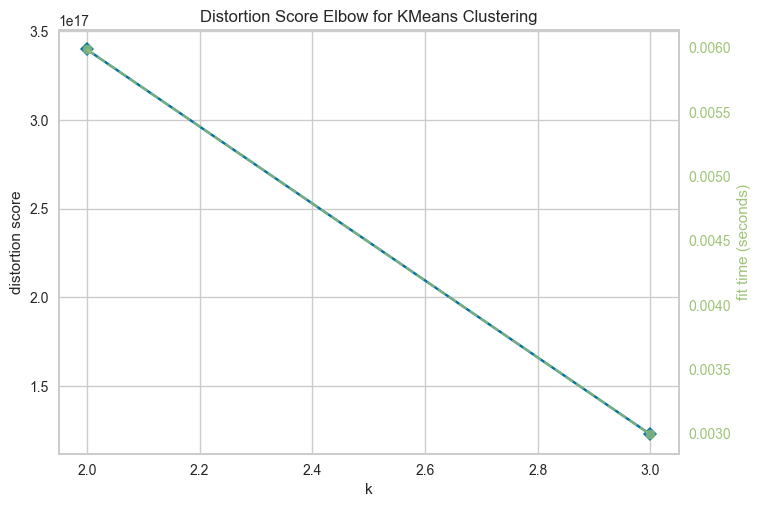

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
# Instantiate the clustering model and visualizer
model = KMeans(3)
visualizer = KElbowVisualizer(model, k=(3))
visualizer.fit(data_X)
visualizer.show()

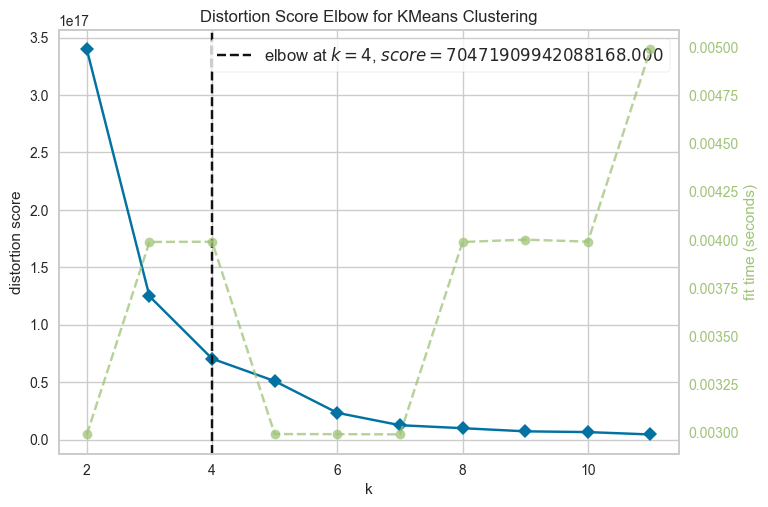

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
# Instantiate the clustering model and visualizer
modelForCheckedGroups  = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(data_X)
# Fit the data to the
visualizer.show()
# Finalize and render the figure

In [72]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

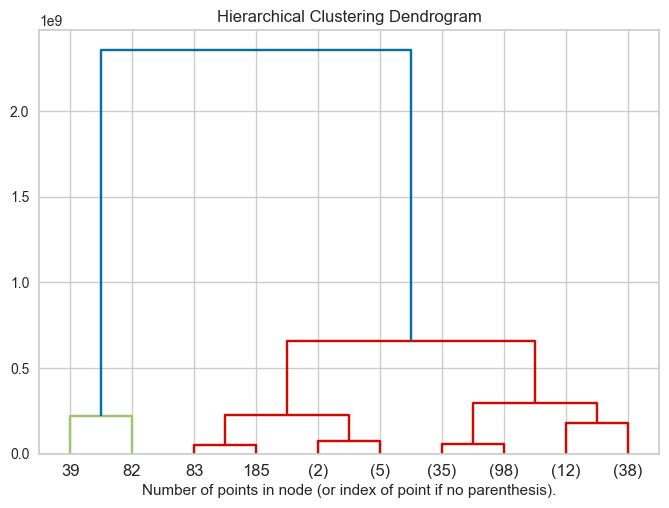

In [73]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data_X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [74]:
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
import geopandas as gpd
import matplotlib.pyplot as plt

# Konwertujemy 'model.children_' na pełną macierz połączeń (linkage matrix)
distance = pdist(data_X)
linkage_matrix = linkage(distance, method='ward')

#przypisanie klastrów do danych
how_many_clusters = 5
cluster_labels = fcluster(linkage_matrix, t=how_many_clusters, criterion='maxclust')

#dodanie etykiety clustrów
data['Cluster'] = cluster_labels

#wczytanie mapy
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Przygotowanie danych klastrów
data['Country'] = data['Country'].str.strip()

#Połączenie danych geograficznych z danymi klastrów
world = world.merge(data[['Country', 'Cluster']], left_on='name', right_on='Country', how='left')

C:\Users\bwojt\AppData\Local\Temp\ipykernel_10208\3565978425.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


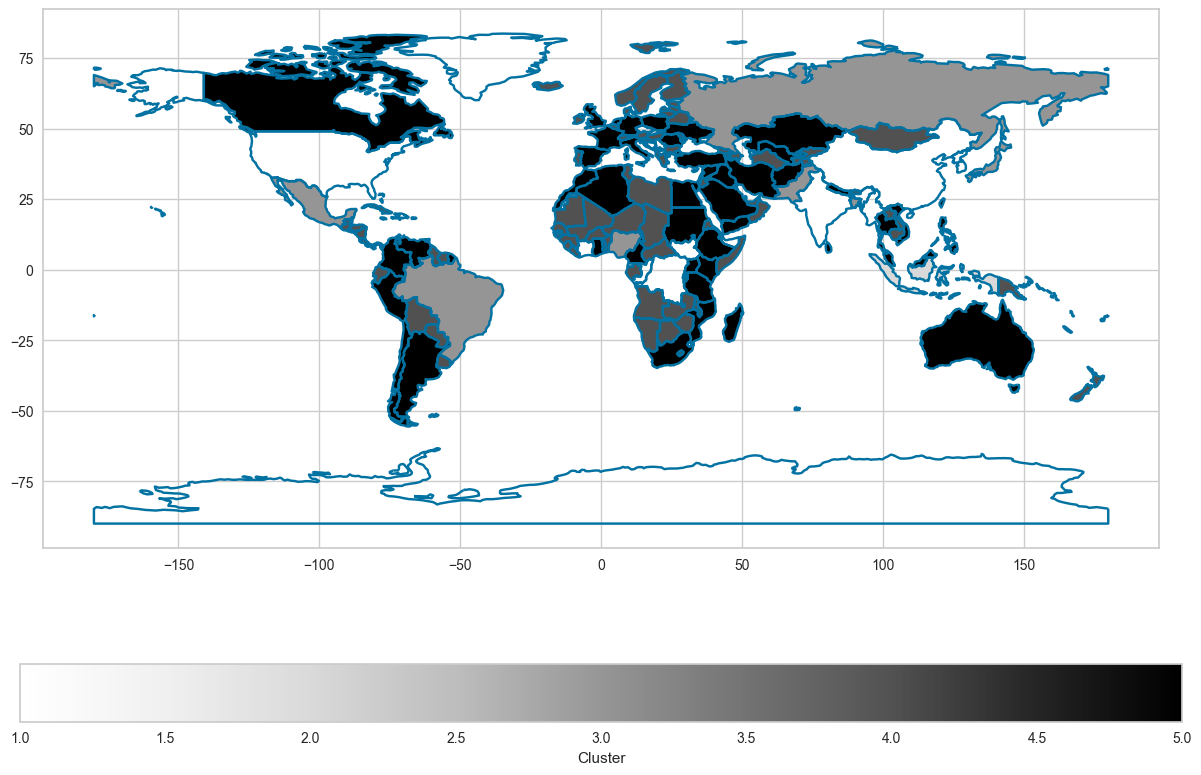

In [75]:
#Rysowanie mapy
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Cluster', ax=ax, legend=True,
           legend_kwds={'label': "Cluster", 'orientation': "horizontal"})
plt.show()

In [84]:
def display_cluster_data():
    for i in range(1, how_many_clusters+1):
        cluster_data = data[data['Cluster'] == i]
        print('------------------------------------------')
        print(f"Cluster {i}:")
        print(cluster_data['Country'])

display_cluster_data()

------------------------------------------
Cluster 1:
42    China
94    India
Name: Country, dtype: object
------------------------------------------
Cluster 2:
95         Indonesia
214    United States
Name: Country, dtype: object
------------------------------------------
Cluster 3:
16     Bangladesh
27         Brazil
103         Japan
135        Mexico
152       Nigeria
156      Pakistan
169        Russia
Name: Country, dtype: object
------------------------------------------
Cluster 4:
1                   Albania
5                    Angola
6                  Anguilla
7         Antigua & Barbuda
9                   Armenia
               ...         
212    United Arab Emirates
215                 Uruguay
217                 Vanuatu
225                  Zambia
226                Zimbabwe
Name: Country, Length: 133, dtype: object
------------------------------------------
Cluster 5:
0           Afghanistan
2               Algeria
8             Argentina
11            Australia
32   